<a href="https://colab.research.google.com/github/RJuro/am-21/blob/main/2021-6-1-calculus3-ed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Recap - Beregning og plot af tangente

Hvordan beregner og plotter vi (med de værktæjer vi har indtil videre) tangenten for $x_0 = 0.5$ ?

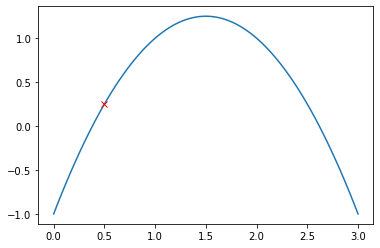

In [18]:
# Vores funktion som plot - same same...

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 3, num=100)
y = -(x**2)+3*x-1

plt.plot(x,y)
plt.plot(0.5, 0.25, 'x', color='red')

In [3]:
# 1. bregening af y0
x0 = 0.5

y0 = -(x0**2)+3*x0-1

print(y0)

0.25


 Husk at vi kan beregne hældning i $x_0$ 
 
 $$a_s=\frac{y_2-y_1}{x_2-x_1}=\frac{f(x_0+h)-f(x_0)}{(x_0+h)-x_0}=\frac{f(x_0+h)-f(x_0)}{h}$$

 eller

 $$a_s=\frac{\Delta y}{h}=\frac{f(x_0+h)-f(x_0)}{h}$$

In [4]:
# opstilling af differenskvotient

from sympy import *

x0, h = symbols('x0, h')

f_x0 = -(x0**2)+3*x0-1

f_x0h = f_x0.subs(x0, x0+h)

In [5]:
f_x0

-x0**2 + 3*x0 - 1

In [6]:
f_x0h

3*h + 3*x0 - (h + x0)**2 - 1

In [7]:
# vi bruger lige m ikke, a_s
m = (f_x0h-f_x0)/h

In [8]:
m

(3*h + x0**2 - (h + x0)**2)/h

In [9]:
# træk h udenfor parantes. OK! :-)
factor(f_x0h-f_x0)

-h*(h + 2*x0 - 3)

In [10]:
# eller med hele differenskvotient
factor(m)

-h - 2*x0 + 3

In [11]:
# eller: brug grænseværdi udregning direkte

m_x0 = limit(m, h, 0)

In [12]:
m_x0

3 - 2*x0

In [13]:
m_x0.subs(x0, 0.5)

2.00000000000000

In [14]:
# tangent - super almindlig linear funktion fx: t = mx + b; Vi kan indsætte fo x0 og y0

# 0.25 = 2*0.5 + b

b = 0.25 - 2*0.5
print(b)

-0.75


Dermed er vores tangent i $x_0:$ $t = 2x - 0.75$ og nu kan vi også plotte det

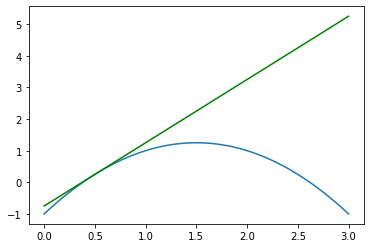

In [15]:
x = np.linspace(0, 3, num=100)
y = -(x**2)+3*x-1

plt.plot(x,y)

t = 2*x - 0.75

plt.plot(x,t, color='green')

### Calculus - Part 3 - Ekstreme punkter
####Del 3.1

I den sidste session lærte vi, hvordan man bruger grænseværdier til at beregne det punkt, en funktion nærmer sig, når inputværdien nærmer sig en bestemt værdi. Vi anvendte denne teknik til at beregne hældningen af tangentlinjen på et bestemt punkt på vores ikke-lineære funktion: $y=-(x^2)+3x-1$. Hvis I husker fra den første calculus session, er vi interesseret i at finde det højeste punkt på denne kurve.

Hvis du nogensinde har vandret ud bjergene, vil du hvordan stien skråner op, indtil man når toppen. Når du først er på toppen, går alle stierne tilbage ned ad skråningen. At forstå, hvordan hældningen varierer i forskellige dele af en kurve, giver en nyttig synsvinkel til at bestemmelse det maksimale punkt på en kurve.

Vi starter med at opbygge en visuel intuition til, hvordan en funktions hældning og dens maksimale punkt er relateret. På billedet nedenfor har vi genereret to plot. Som $x$ varierer, visualiserer plottet til venstre, **hvordan tangentlinjen for kurven ændres**, mens plottet til højre visualiserer, **hvordan hældningen af denne tangentlinje ændres**.

In [ ]:
import IPython
iframe = '<iframe src="https://www.desmos.com/calculator/kxlspqhjaj" width="1000px" height="500px" style="border: 1px solid #ccc" frameborder=0></iframe>'
IPython.display.HTML(iframe)


#### Del 3.2
Når $x$ er mindre end $1.5$, er hældningen positiv. Som $x$ nærmer sig $1.5$ fra venstre side falder hældningen og nærmer sig $0$. Ved $x=1.5$, er hældningen af tangentlinjen nøjagtigt 0. Når vi hæver $x$ forbi $1.5$ bliver tangentlinjens hældning mere og mere negativ. Det højeste punkt på vores kurve fungerer som en slags overgangspunkt fra positiv hældning til negativ hældning. Vi diskuterer dette nærmere senere i denne mission. 

Ved at plotte m-værdiene for mange forskellige $x$ værdier, kan vi se, at de følger en lige linje. Denne linje kan beskrives som sin egen funktion og er kendt som **afledede funktion**. En funktions afledete kan fortælle os hældningen af tangentlinjen for enhver $x$ værdi langs funktionen.

In [ ]:
iframe = '<iframe src="https://www.desmos.com/calculator/mqxu3c6nrf" width="1000px" height="500px" style="border: 1px solid #ccc" frameborder=0></iframe>'
IPython.display.HTML(iframe)



Indtil videre har vi løst hældningen på bestemte punkter ved at indsætte den specifikke $x$ værdi i hældningsligningen som udtrykt af grænseværdien. For at finde den generelle funktion, der beskriver hældningen til enhver tid, skal vi løse grænseværdien ved hjælp af den oprindelige variabel i stedet for at erstatte med en bestemt $x$ værdi.

Lad os først starte med at omskrive hældningsligningen til den mere almindelige form. I stedet for at bruge $x_1$ og $x_2$ i hældningsligningen, bruger vi $x$ og $x + h$. Denne version af hældningsligningen er, hvordan de fleste lærebøger og ressourcer henviser til hældning:

$$\lim_{h \to 0} \frac{f(x + h) - f(x)}{h}$$

I denne form repræsenterer $h$ afstanden mellem 2 punkter: $x$ og $h$. Hældningen er værdien, grænsen nærmer sig, som $h$ nærmer sig $0$. Observer den følgende visualisering, for at få en bedre forståelse for denne form for hældning. I næste afsnit kigger vi mere på at finde den afledede funktion. 

#### Del 3.3
Processen med at finde en funktions afledede funktion er kendt som **differentiering**. I stedet for at vælge en bestemt $x$ værdi, efterlader vi $x$ hvor det er, og udvider ligningen for at løse for den afledede. Ved at indsætte $f(x) = x(x)^2 + 3x -1$, bliver det hele til: 

$\lim_{h \to 0} \frac{(-(x + h)^2 + 3(x + h) - 1) - (-(x)^2 + 3x - 1)}{h}$

Hvis vi fortsætter med at udvide ligningen til individuelle udtryk, får vi:

$\lim_{h \to 0} \frac{-x^2 - 2xh - h^2 +3x + 3h - 1 + x^2 - 3x + 1}{h}$

Efter at annullere modsatte udtryk får vi følgende ligning:

$\lim_{h \to 0} \frac{-2xh - h^2 + 3h}{h}$

Når vi fraregner $h$ i alle udtryk i tælleren og nævneren, får vi:

$\lim_{h \to 0} \frac{h(-2x - h + 3)}{h}$

Hvis vi annullerer $h$ på både tælleren og nævneren får vi en defineret grænseværdi.

$\lim_{h \to 0} -2x - h + 3$

Vi kan nu løse i det sidste trin ved at indsætte, som vi så i den sidste session. Bemærk, at resultatet af denne grænseværdi ikke vil være en enkelt værdi, men i stedet en ny funktion.




Bare en kort gennemgang (ikke noget nyt) af hvordan man kan gøre det i Sympy

In [19]:
# fra tangent-eksempel
f_x0

-x0**2 + 3*x0 - 1

In [20]:
f_x0h

3*h + 3*x0 - (h + x0)**2 - 1

In [23]:
# m = (f_x0h-f_x0)/h
m

(3*h + x0**2 - (h + x0)**2)/h

In [25]:
m.simplify()

-h - 2*x0 + 3

**Øvelse:**

* Forenkl ligningen ved at idsætte direkte for at løse grænsenværdien.

* Brug numpy.linspace() til at generere **110** værdier fra **-5** til **6** og gem det som **x**.
* Transformer **x** ved hjælp af ligningen, du lige har løst, og dem i **y**.
* Generer et linjediagram af **x** og **y**.



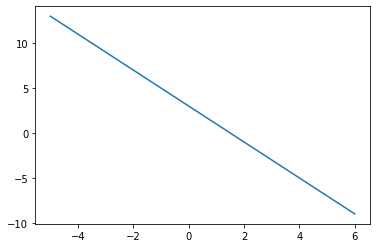

In [27]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-5, 6, 110)
y = -2*x+3
plt.plot(x,y)

#### Del 3.4
Linjeplottet, vi lige lavede  matcher det set tidligere, der visualiserer, hvordan hældningen ændrer sig for forskellige $x$ værdier. Vi bruger følgende notation til at specificere at $-2x +3$ er vores kurves afledede:

$y' = -2x + 3$

Det følgende er en alternativ form for at skriver det, som gør det klart, at det afledede af $y$ er en funktion af $x$:

$f'(x) = -2x + 3$

Den sidste almindelige notation er følgende, som kan læses som "aflede ift. x er":

$\frac{d}{dx}[ -x^2 + 3x - 1 ] =  -2x + 3$

Tidligere så vi, hvordan hældningen ved $x = 1,5$ var $0$ og fungerede som et overgangspunkt fra positiv hældning til negativ hældning. Dette er formelt kendt som et **kritisk punkt**. På en funktions kritiske punkt er hældningen enten 0 eller udefineret. Ikke alle kritiske punkter fungerer dog som overgangspunkter for hældninger. Det følgende billede visualiserer hældningen for $y = x^3$ og giver mulighed at undersøge, hvordan hældningen ændres før og efter det kritiske punkt. I kan se, hvordan hældningen forbliver positiv før og efter det kritiske punkt.


In [ ]:
iframe = '<iframe src="https://www.desmos.com/calculator/8jtzsafbsz" width="1000px" height="500px" style="border: 1px solid #ccc" frameborder=0></iframe>'
IPython.display.HTML(iframe)

#### Del 3.5
Vi kan se hvordan hældningen ikke skifteder fra positiv til negativ på det kritiske punkt. Kritiske punkter er interessante for os, når de repræsenterer **ekstreme værdier**. Ekstreme værdier kan opdeles i 2 kategorier - minimum og maksimum. Som vi så i starten af dorelæsningen, kan et kritisk punkt være en minimumsværdi, hvis hældningen går fra negativ til positiv på det tidspunkt. Når hældningen overgår fra positiv til negativ på et punkt, kan det være en maksimal værdi. Hvis hældningen ikke "skifter" fortegn på et kritisk punkt, som ved $x = 0$ for $y = x^3$ i det sidste billede, kan det ikke være et minimum eller et maksimalt punkt.

En kurve kan have flere kritiske punkter og flere kandidater til minimums- og maksimumværdier. Den følgende kurve har 4 kritiske punkter, og alle 4 opfylder kriterierne for overgang af hældning fra positiv til negativ eller negativ til positiv. Lokale minima er tegnet ind.



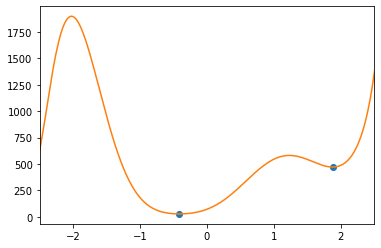

In [28]:
# !!!OBS!!!: avanceret kode og matematik bare til visualisering - ikke relevant / ikke del af pensum

import numpy as np
from matplotlib.pyplot import *

# define polynomial function
c = np.poly1d([2,-4,-28,62,122,-256,-196,140,392,240,72])

crit = c.deriv().r
r_crit = crit[crit.imag==0].real
test = c.deriv(2)(r_crit) 


# compute local minima 
# excluding range boundaries
x_min = r_crit[test>0]
y_min = c(x_min)
plot( x_min, y_min, 'o' )

xc = np.arange(-2.5, 2.6, 0.02)
yc = c(xc)
plot( xc, yc)

xlim([-2.5,2.5])
show()

Disse værdier er kendt som lokale ekstrema, da de er den laveste eller højeste værdi i intervallet omkring hvert punkt. Hvis et kritisk punkt er det laveste punkt i intervallet omkring det, er det kendt som et **relativt minimum**. Hvis det er det højeste punkt i kvarteret, er det kendt som et **relativt maksimum**.

Vi ved, at relative minimum og maksimum kan forekomme, når hældningen er $0$. Derfor kan vi finde kritiske punkter ved hjælp af aritmetik (i stedet for kun at stole på grafen). For at beregne det kritiske punkt for vores oprindelige kurve skal vi sætte vores aflede funktion = $0$ og løse for $x$.

$-2x + 3 = 0$

Efter at have flyttet $-2x$ til højre og delt begge sider med $2$, får vi:

$x = 1.5$

Dette matcher den værdi, vi observerede visuelt i første calculus forelæsning. Da denne kurve kun havde 1 kritisk punkt, og hældningen overgik fra positiv til negativ, kan vi med sikkerhed sige, at dette er et relativt maksimum.

#### Del 3.6
Vi beregnede afledede for vores kurve ved hjælp af en grænseværdi og udregning med aritmetikken. Vi sætter derefter den afledede funktion til 0 og beregner de kritiske punkter. Tilgangen kældes også for "tretrinsreglen". Denne tilgang er nok ikke den bedste for mere komplekse funktioner som $y = x^5 − x$, fordi vi bliver nødt til at erstatte $x$ med $x + h$ og udvide eksponenten $(x+h)^5$:

$$f'(x) = \lim_{h \to 0} \frac{((x + h)^5 - (x + h)) - (x^5 - x) }{h}$$

Vi kan i stedet bruge nogle regler for at differentiere. Disse regler har beviser som hænger sammen med vores tidligere tilgang, der ligger uden for pensum, men i kan selv søge yderligere information efter behov f.eks. [her](https://tutorial.math.lamar.edu/classes/calci/DerivativeProofs.aspx)

Den første regel, vi introducerer er det der hedder *power rule* på engelsk (tror ikke der er navne til enkelte regler på dansk), som hjælper os med at tage aflededed funktioner med eksponenter.

$f'(x) = r x^{r-1}$

Hvis vores oprindelige funktion var $f(x) = x^2$, ville $r$ være $2$. Den afledede ville være $f'(x) = 2x^{2-1}$ eller $f'(x) = 2x$ kort. Funktionen for vores oprindelige kurve er en lignende værdi $(-x^2)$ tilføjet til $3x-1$:

$f(x) = -(x)^2 + 3x - 1$

Når vi beregner afledede af en funktion, beregner og løser vi i virkeligheden en grænseværdi. Vi kan bruge egenskaberne for grænseværdier til at nedbryde funktionen i 3 forskellige differentialer. Vi kan derefter anvende reglen på hver komponent:

$f'(x) = -2x + 3$

Dette matcher den afledede funktion, vi har beregnet manuelt ved hjælp af grænseværdier. Lad os øve at anvende reglen på nogle flere funktioner.


**Øvelse:**
* Beregn den afledede af $f(x) = x^5$ ved hjælp af blyant og papir (? eller bare i hoved). Brug den den afledede til at udregne hældningen ved $x = 2$ og gem som **slope_one**.

* Beregn den afledede af $f(x) = x^9$ ved hjælp af blyant og papir. Brug den afledede funktion til at udregne hældningen ved $x = 0$ og gem som **slope_two**.


In [30]:
derivative_one = "5x**4"
derivative_two = "9x**8"

slope_one = 5*2**4
slope_two = 9*0**8

print(slope_one)
print(slope_two)

80
0


In [31]:
# beregning i sympy

x = symbols('x')

f1 = x**5
f2 = x**9

In [35]:
derivative_one = diff(f1)
derivative_one

5*x**4

In [36]:
derivative_two = diff(f2)
derivative_two

9*x**8

In [37]:
derivative_one.subs(x, 2)

80

In [38]:
derivative_two.subs(x, 0)

0

#### Del 3.7
Et andet vigtigt regelsæt er **linearitet af differentiering**. Vi skifter til at bruge notationen $\frac{d}{dx}$, når vi diskuterer disse regler. Som med grænseværdifunktioner kan vi adskille matematiske termer, der tilføjes eller trækkes fra, og differentiere dem separat.

Lineæritet af differentiering består af 2 regler. Først er summeringsreglen:

$\frac {d}{dx} [f(x) + g(x)] = \frac {d}{dx} [f(x)] + \frac {d}{dx} [g(x)]$

For det andet er den konstante faktorregel, som lader os trække konstanter ud af den afledede:

$\frac {d}{dx} [cf(x)] = c\frac {d}{dx} [f(x)]$

Ved at kombinere begge disse regler kan vi finde afledede for en lang række funktioner. For eksempel:

$\frac {d}{dx} [-x^3 + x^2 ] =  \frac {d}{dx} [-x^3] + \frac {d}{dx} [x^2] = -3x^2 + 2x$


**Øvelse:**
* Beregn afledede af $f(x) = x^5 − x$ ved hjælp af blyant og papir. Brug den afledede funktion til at udregne hældningen ved $x = 1$ og gem som **slope_tree**.
* Beregn afledede af $f(x) = x^3 − x^2$ ved hjælp af blyant og papir. Brug den afledede funktion til at udregne hældningen ved $x = 2$ og gem som  **slope_four**.


In [43]:
derivative_three = "5x**4-1"
derivative_four = "3x**2-2x"
slope_three = 5*1**4-1
slope_four = 3*2**2-2*2

In [44]:
print(slope_three)
print(slope_four)

4
8


In [ ]:
# beregning i sympy

In [46]:
f3 = x**5-x
f4 = x**3-x**2

derivative_three = f3.diff()

derivative_four = f4.diff()

In [47]:
derivative_three

5*x**4 - 1

In [48]:
derivative_four

3*x**2 - 2*x

In [49]:
derivative_three.subs(x, 1)

4

In [50]:
derivative_four.subs(x, 2)

8

#### Del 3.8
Tidligere startede vi med at tegne kurven og visuelt observere, hvor de kritiske punkter kunne være. Denne gang vil vi ikke plotte men finde de ekstreme værdier ved udregning.

Du skal først sætte $3x^2−2x$ = $0$ og løse for $x$. Når du har fundet det/de kritiske punkt(er), kan du analysere hældningen omkring punkterne for at se, om hældningen overgår fra positiv til negativ eller omvendt.

For at analysere hældningsretningen kan vi bruge et [**fortegns-diagramm**](http://www.rasmus.is/uk/t/F/Su53k02.htm)(*sign chart*).  Her er vi kun interesserede i, om et givet punkt i et område kommer positivt eller negativt ud. Dette værktøj gør det nemt at analysere hældningsretningen (positiv eller negativ).

Vi kan teste punkter omkring vores interessepunkter for at se, om der er et fortegnsændring og hvad ændringen er.


**Øvelse**
* brug sympy
* Find kritiske punkter for $f(x) = x^3 − x^2$.
* find ud om det handler om relativ minimum eller maksimum

In [55]:
f = x**3-x**2

fd = diff(f)
fd

3*x**2 - 2*x

In [56]:
factor(fd)

x*(3*x - 2)

In [60]:
solveset(fd)

FiniteSet(0, 2/3)

In [61]:
sign_chart = [-0.5, 0, 1/3, 2/3, 1]

In [62]:
[fd.subs(x,i) for i in sign_chart]

[1.75000000000000, 0, -0.333333333333333, 0, 1]

lidt visualisering

In [63]:
p1_space = np.linspace(-0.1, 0.1, 10)
p1_y = 3*p1_space**2 - 2*p1_space

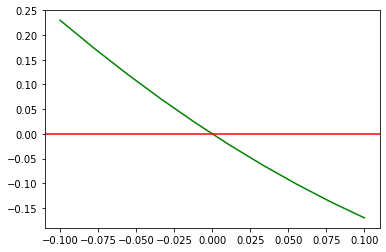

In [64]:
plt.plot(p1_space,p1_y, color='green')
plt.axhline(y=0.0, color='r', linestyle='-')

In [66]:
p2_space = np.linspace(1/3, 3/3, 10)
p2_y = 3*p2_space**2 - 2*p2_space

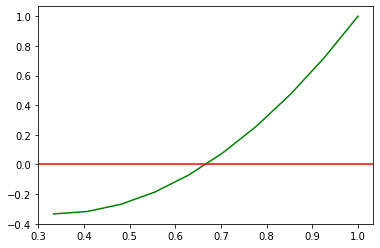

In [67]:
plt.plot(p2_space,p2_y, color='green')
plt.axhline(y=0.0, color='r', linestyle='-')

## Vi kan selfølgelig bruge SymPy til al differentering

In [68]:
from sympy import *

x = symbols('x')

#f = -(x**3)+3*x**2-1

f = x**3-x**2

f

x**3 - x**2

In [69]:
# 😎

f.diff()

3*x**2 - 2*x

In [70]:
fd = f.diff()

In [71]:
solveset(fd, x)

FiniteSet(0, 2/3)

In [73]:
sign_chart = [-1, -0.5, 0, 1/3, 2/3, 1, 1.5]

In [76]:
# list comprehension hvor vi beregner hældning for alle værdier i sign_chart
[fd.subs(x, i) for i in sign_chart]

[5, 1.75000000000000, 0, -0.333333333333333, 0, 1, 3.75000000000000]

In [77]:
# men ikke

fd.subs(x, 0)

0

## Øvelse

En virksomhed kan maximalt producere 1300 pumper af en specifik type per år. Hvor mange pumper skal produceres for at maksimere profit in DKK, som er givet ved:

$$ P = 60000000 - 720000x + 1500*x^2 - \frac{2}{3}x^3$$

Løs med SymPy


In [78]:
# definer funktion

x = symbols('x')
f = 60000000 - 720000*x + 1500*x**2 - (2/3*x**3)

f

-0.666666666666667*x**3 + 1500*x**2 - 720000*x + 60000000

In [79]:
# find f'(x)
fd = diff(f)
fd

-2.0*x**2 + 3000*x - 720000

In [81]:
# find ekstrempunkter 

solutions = solveset(fd, x)
solutions

FiniteSet(300.0, 1200.0)

In [82]:
sign_chart = [200, 300, 500, 1200, 1300]

In [83]:
[fd.subs(x, i) for i in sign_chart]

[-200000.000000000, 0, 280000.000000000, 0, -200000.000000000]

In [84]:
[f.subs(x, s) for s in solutions]

[-39000000.0000000, 204000000.000000]

In [85]:
# der skal produceres

pumper = 1200

#### Del 3.x - Opsummering
* En afledede funktion er hældningen af tangentlinjen på et hvilket som helst punkt langs en kurve.
* Lad $x$ være et punkt på kurven og $h$ være afstanden mellem to punkter, så er den matematiske formel for hældningen, når $h$ nærmer sig nul, givet som: $f'(x) = \lim_{h \to 0}\frac{f(x+h)-f(x)}{h}$
* Differientering er en proces for at finde en funktions afledede.
* For at finde afledede af: $f(x) = -(x)^2 + 3x -1$:
  * $y' = \lim_{h \to 0} \frac{(-(x + h)^2 + 3(x + h) - 1) - (-(x)^2 + 3x - 1)}{h}$
  * $y' = \lim_{h \to 0} \frac{-x^2 - 2xh - h^2 +3x + 3h - 1 + x^2 - 3x + 1}{h}$
  * $y' = \lim_{h \to 0} \frac{h(-2x - h+3)}{h}$
  * $y' = \lim_{h \to 0} -2x - h + 3$
  * $y' = 2x +3$
* Tre måder at annotere en kurves afledede:
  * $y' = -2x + 3$
  $f'(x) = -2x +3$ *Brug kun hvis derivativet er en funktion
  * $\frac{d}{dx}[-x^2 + 3x -1] = -2x + 3$
* Et kritisk punkt er et punkt, hvor hældningen ændrer retning fra negativ hældning til positiv hældning eller omvendt. Kritiske punkter repræsenterer ekstreme værdier, som kan klassificeres som et minimum eller ekstrem værdi.
* Klassificering af kritisk punkt: 
  * Når hældningen ændrer retning fra positiv til negativ, er det en maksimumsværdi.
  * Når hældningen ændrer retning fra negativ til positiv, er det en minimumsværdi.
  * Hvis hældningen ikke ændrer retning, som for eksempel ved $x = 0$ for $y = x^3$, kan det ikke være et minimum eller maksimumsværdi.
* Hvert maksimums- eller minimumværdipunkt er kendt som lokalt ekstremum.
* Klassificering af lokalt ekstrema:
  * Et punkt er et relativt minimum, hvis et kritisk punkt er det laveste punkt i et givet interval.
  * Et punkt er et relativt maksimum, hvis et kritisk punkt er det højeste punkt i et givet interval.
* I stedet for at bruge definitionen af afledede kan vi anvende nogle regler for let at beregne
de afledte funktioner.
* Regler: 
  * Power rule: Lad $r$ være en potens, så er $f'(x) = rx^{r-1}$
    * Eksempel: I vores funktion $f(x) = x^2$, vil vores $r$ være $2$. Ved at bruge power rule, ville den afledede være $f'(x) = 2x^{2-1}$, eller, $f'(x) =2x$.
  * Summeringsregel: $\frac {d}{dx} [f(x) + g(x)] = \frac {d}{dx} [f(x)] + \frac {d}{dx} [g(x)]$
    * Eksempel: $\frac {d}{dx} [-x^3 + x^2 ] =  \frac {d}{dx} [-x^3] + \frac {d}{dx} [x^2] = -3x^2 + 2x$
  * Konstant faktorregel: $\frac{d}{dx}[3x] = 3\frac{d}{dx}x = 3i = 3$
* Afledede af $x$ er altid $1$, og den afledede af $1$ er altid $0$  
* Når du har fundet de kritiske punkter i en funktion, kan du analysere hældningsretningen omkring punkterne ved hjælp af et tegndiagram for at klassificere punktet som et minimum eller et maksimum. Vi kan teste punkter omkring vores interessepunkter for at se om der er et tegnændring såvel som hvad ændringen er.

  
